<a href="https://colab.research.google.com/github/SharonCao0920/AI/blob/main/CS483_Lecture_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Question_2.Design KNN classifier based on the following small dataset
- Preprocess the dataset first before any processing by substituting M & F with 
0 and 1 respectively
"""
%cd /content/drive/My Drive/Colab Notebooks/Lecture
import pandas as pd
#reading data
df=pd.read_excel("Question2.xlsx","Sheet1")
df=df[:-1]
print(df)
#cvs file
# df.replace({'Gender':'M'}, '0')
# df.replace({'Gender':'F'}, '1')
# df.replace(to_replace ="M",
#                  value ="0")

#replace for excel file
print('------------------------------------------------')
df.loc[df['Gender'] == 'M', 'Gender'] = '0'
df.loc[df['Gender'] == 'F', 'Gender'] = '1'
print(df)

/content/drive/My Drive/Colab Notebooks/Lecture
   ID     Name  Age Gender             Fan
0   0     Bill   32      M  Rolling Stones
1   1    Henry   40      M         Neither
2   2     Mary   16      F    Taylor Swift
3   3  Tiffany   14      F    Taylor Swift
4   4  Michael   55      M         Neither
5   5   Carlos   40      M    Taylor Swift
6   6   Ashely   20      F         Neither
7   7   Robert   15      M    Taylor Swift
8   8    Sally   55      F  Rolling Stones
9   9     John   15      M  Rolling Stones
------------------------------------------------
   ID     Name  Age Gender             Fan
0   0     Bill   32      0  Rolling Stones
1   1    Henry   40      0         Neither
2   2     Mary   16      1    Taylor Swift
3   3  Tiffany   14      1    Taylor Swift
4   4  Michael   55      0         Neither
5   5   Carlos   40      0    Taylor Swift
6   6   Ashely   20      1         Neither
7   7   Robert   15      0    Taylor Swift
8   8    Sally   55      1  Rolling Stones


In [67]:
"""
- Calculate error rate for validation set from K=1 to K=7 either in Python program or Excel 
- Select an appropriate K’s value and predict what class the new data in red color belongs to
- Finally write Python program by calling functions from scikit-learn to verify your design based on hand calculation results
"""
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("HW#3_exl.xlsx","Sheet3")
print("Dataset is: \n",df)

X = df.iloc[:, 2:-1].values
y = df.iloc[:, 4].values

"""
- Randomly separate the dataset to training set (70%) and validation set (30%) 
by sample’s ID generated either from Python program or Excel unduplicated random 
function
"""
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=42)
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

print("---------------------------------")
y_pred = classifier.predict(X_test)
print("Result of testing set: ")
print(y_pred)

from sklearn.metrics import classification_report, confusion_matrix
print("---------------------------------")
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

print("---------------------------------")
x_p = scaler.transform([[10,1]])
y_xp = classifier.predict(x_p)
print("Prediction of value:\n", y_xp)

Dataset is: 
    ID     Name  Age  Gender             Fan
0   0     Bill   32       0  Rolling Stones
1   1    Henry   40       0         Neither
2   2     Mary   16       1    Taylor Swift
3   3  Tiffany   14       1    Taylor Swift
4   4  Michael   55       0         Neither
5   5   Carlos   40       0    Taylor Swift
6   6   Ashely   20       1         Neither
7   7   Robert   15       0    Taylor Swift
8   8    Sally   55       1  Rolling Stones
9   9     John   15       0  Rolling Stones
---------------------------------
Result of testing set: 
['Taylor Swift' 'Taylor Swift' 'Taylor Swift']
---------------------------------
Confusion matrix
[[0 0 1]
 [0 0 1]
 [0 0 1]]
---------------------------------
Prediction of value:
 ['Taylor Swift']


Dataset is: 
   Objects  X  Y  Z
0    OB-1  1  4  1
1    OB-2  1  2  2
2    OB-3  1  4  2
3    OB-4  2  1  2
4    OB-5  1  1  1
5    OB-6  2  4  2
6    OB-7  1  1  2
7    OB-8  2  1  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.


---------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.


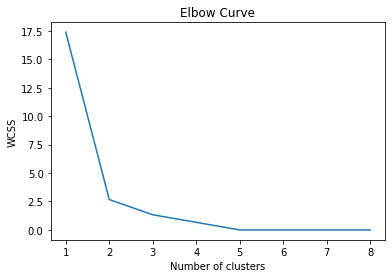

In [77]:
"""
3.K-Means algorithm is one of popular methods in unsupervised learning. Please 
plot elbow curve of total WCSS (within cluster sum of square) vs K from 1 to 5 
either created by hand or Python program and select a proper K’s value based on 
your observation as the final number of clusters in your design. And then write 
Python program to verify your by-hand calculation results
"""
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

dataset = pd.read_excel("HW#3_exl.xlsx","Sheet4")
print("Dataset is: \n", dataset)
X = dataset.iloc[:, [1, 2]].values
#print(X)

from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 9): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
print("---------------------------------")
plt.plot(range(1, 9), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()